# Lenet Architecture

#Load Dataset

In [1]:
import tensorflow as tf

In [2]:
(xtrain,ytrain),(xtest,ytest)= tf.keras.datasets.mnist.load_data()

# Feature Scaling

In [3]:
# why this step why normalization
# - This step ensures that all pixel values are in a common scale, making it easier for the optimizer to converge.
xtrain = xtrain/255.0
xtest = xtest/255.0

In [4]:
xtrain.shape

(60000, 28, 28)

In [5]:
# why reshaping?
# In the MNIST dataset, each image is represented as a 28x28 grayscale image.
# However, the LeNet-5 architecture expects the input to be in the shape (batch_size, height, width, channels).
#As the images are grayscale, the channel is set to 1. Therefore, we reshape the images to (num_samples, 28, 28, 1).

xtrain = xtrain.reshape(xtrain.shape[0],28,28,1)
xtest = xtest.reshape(xtest.shape[0],28,28,1) # here batch size is 6000 we want to consider whole image

In [6]:
xtrain.shape[0]

60000

In [7]:
ytrain

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

# Convert y to vector of length 10 using one hot encoding
One-hot encoding is a way to represent categorical labels as binary vectors. Each label is converted into a vector of length equal to the number of classes. The vector will have all zeros except for the index corresponding to the class label, which will be set to 1. This representation allows the model to better understand the categorical nature of the output.

In the case of MNIST, each label is an integer from 0 to 9. After applying one-hot encoding, the labels will be represented as binary vectors of length 10.

In [8]:
from tensorflow import keras
from keras.utils import np_utils

In [9]:
ytrain = np_utils.to_categorical(ytrain,10)
ytest = np_utils.to_categorical(ytest,10)

In [10]:
ytrain.shape

(60000, 10)

# lets build model

In [11]:
#Architecture


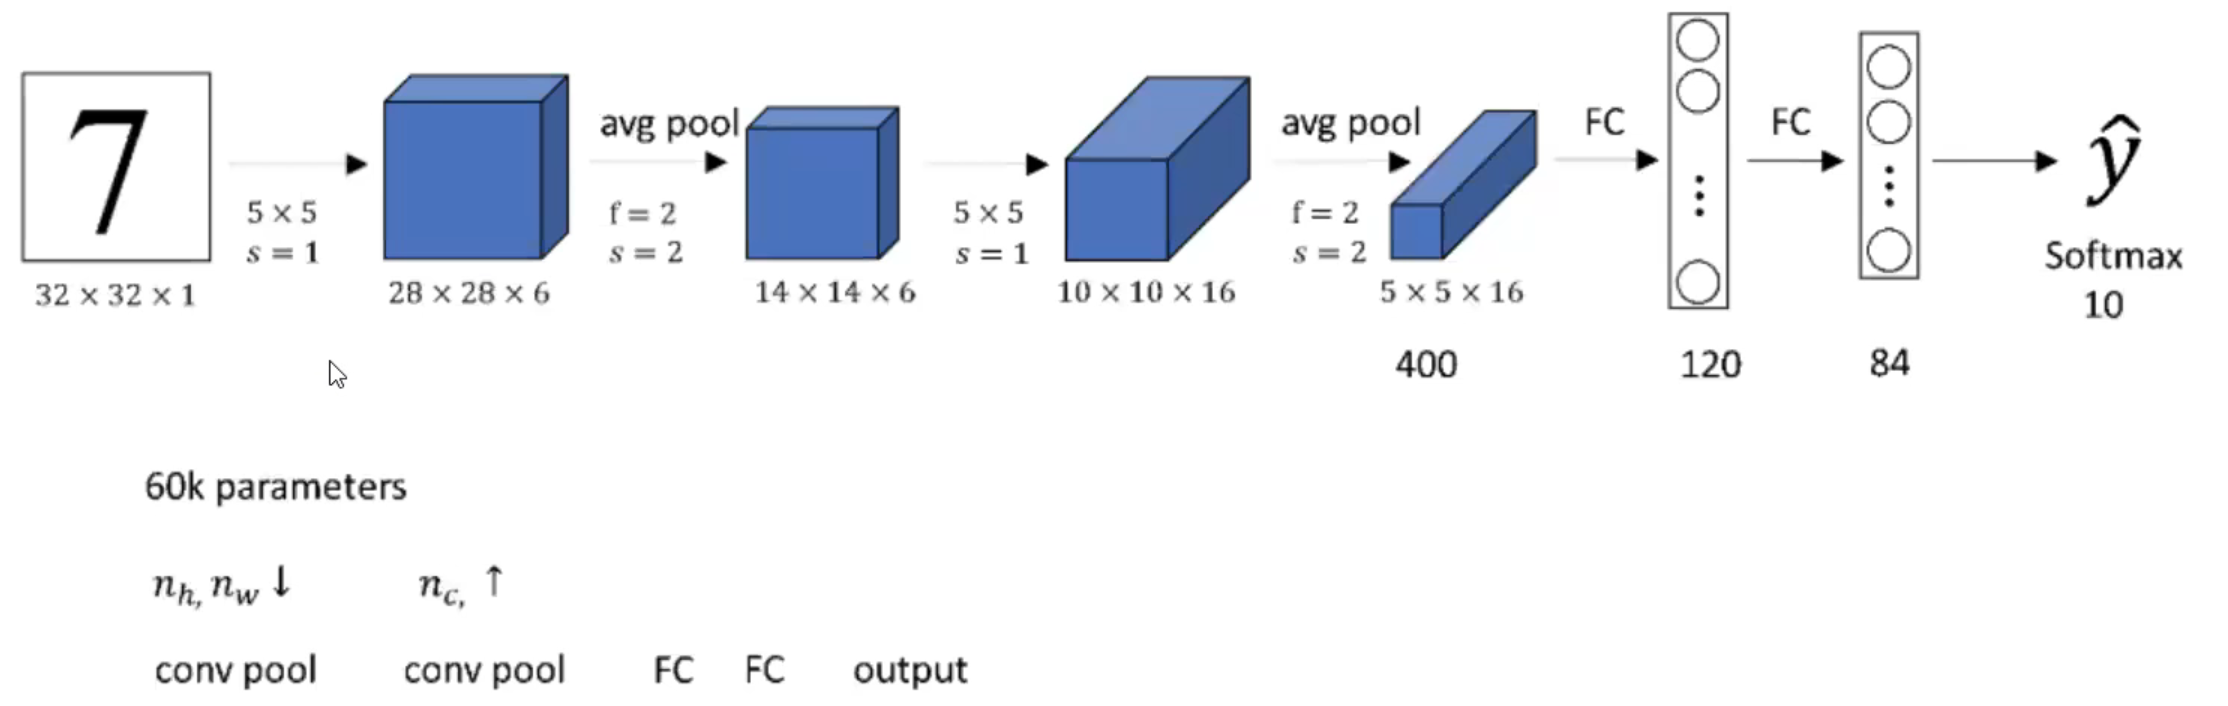

In [12]:
from keras.layers import Conv2D, Dense, Flatten, AveragePooling2D
from keras import Sequential

In [16]:
model = Sequential()

# part 1
model.add(Conv2D(6,kernel_size=(5,5),padding="valid", activation="tanh", input_shape=(28,28,1)))
model.add(AveragePooling2D(pool_size = (2,2),strides = 2, padding="valid"))

#part 2
model.add(Conv2D(16,kernel_size=(5,5),padding="valid", activation="tanh",))
model.add(AveragePooling2D(pool_size = (2,2),strides = 2, padding="valid"))

# part 3
model.add(Flatten()) #The flatten layer does precisely that by reshaping the 3D tensor into a long 1D vector, effectively "flattening" the spatial structure.

# part 4
model.add(Dense(120,activation = "tanh"))
model.add(Dense(84, activation='tanh'))
model.add(Dense(10, activation='softmax'))

# part5
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d_1 (Averag  (None, 12, 12, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_2 (Averag  (None, 4, 4, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)              

In [17]:
# filter is 6 and filter size = 5 with bias 1
# 156 = (5*5 + 1) * 6
#2416 = (5*5*6 + 1) * 16
# 30840 = (256*120) + 120
# 10164 = (120*84) + 84
# 850 = (84*10) + 10

# Lets plots some numbers

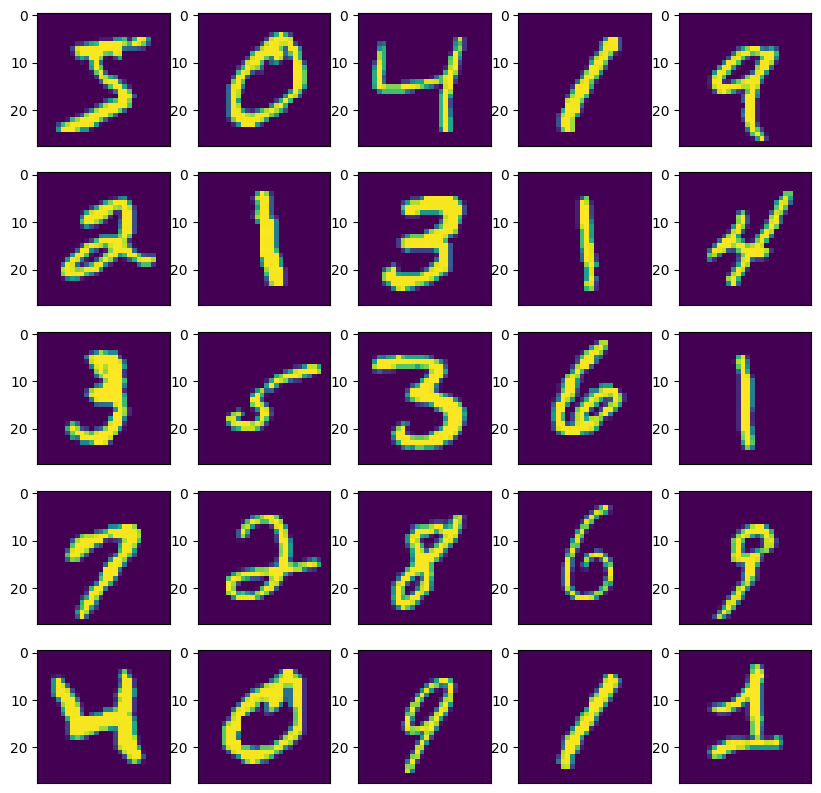

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.imshow(xtrain[i])


In [22]:
model.compile(optimizer = "adam", loss = keras.losses.categorical_crossentropy, metrics = ["accuracy"])

In [23]:
history = model.fit(xtrain,ytrain,validation_data = (xtest,ytest), epochs =20, batch_size = 128, verbose = 1)

Epoch 1/20
469/469 [==============================] - 15s 7ms/step - loss: 0.3519 - accuracy: 0.9001 - val_loss: 0.1523 - val_accuracy: 0.9558
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1258 - accuracy: 0.9619 - val_loss: 0.0956 - val_accuracy: 0.9722
Epoch 3/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0807 - accuracy: 0.9754 - val_loss: 0.0642 - val_accuracy: 0.9799
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0605 - accuracy: 0.9811 - val_loss: 0.0553 - val_accuracy: 0.9815
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0479 - accuracy: 0.9851 - val_loss: 0.0559 - val_accuracy: 0.9817
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0403 - accuracy: 0.9877 - val_loss: 0.0502 - val_accuracy: 0.9839
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0336 - accuracy: 0.9896 - val_loss: 0.0472 - val_accuracy: 0.9848
Epoch